<a href="https://colab.research.google.com/github/izabellafloresn/estudando-python-e-pandas/blob/main/Trabalhando_com_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong> Trabalhando com Datas </strong>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel ("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel ("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel ("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel ("/content/drive/MyDrive/Datasets/Salvador.xlsx")

<strong> Trabalhando com Datas </strong>

In [ ]:
#Juntando todos os arquivos importados
df = pd.concat([df1, df2,df3, df4, df5])

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [ ]:
#Transformando de volta a coluna data para datetime 
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Transformando o tipo de dado de LojaID de inteiro para String 
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Criando uma coluna de receitas
df["Receita"] = df ["Vendas"].mul(df["Qtde"])
df ["Receita/Vendas"] = df["Receita"] / df ["Vendas"]

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupando a receita por ano
df.groupby(df["Data"].dt.year) ["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
24,Aracaju,2018-01-01,151.04,1522,6,906.24,6.0,2018
83,Aracaju,2018-01-01,14.44,1520,5,72.20,5.0,2018
210,Salvador,2019-01-02,197.64,1035,1,197.64,1.0,2019
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019
110,Aracaju,2018-01-01,38.15,1520,4,152.60,4.0,2018


In [ ]:
#Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
157,Salvador,2019-01-02,150.17,1036,2,300.34,2.0,2019,1,2
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,4.0,2019,1,1
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019,1,12
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019,1,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2
53,Recife,2019-01-01,37.05,983,6,222.30,6.0,2019,1,1


In [ ]:
#Vendo a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#CRiando coluna do trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Trimestre_Venda
236,Natal,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,1
105,Salvador,2019-01-01,32.83,1037,1,32.83,1.0,2019,1,1,1
43,Natal,2019-04-01,538.00,853,3,1614.00,3.0,2019,4,1,2
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,1


In [ ]:
#Escolhendo as datas de 2019 e num mês específico
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Trimestre_Venda
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,1
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,2019,3,17,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,1.0,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,1


<strong> Visualização de dados </strong>

In [ ]:
#verifica quantas vendas a loja x fez
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

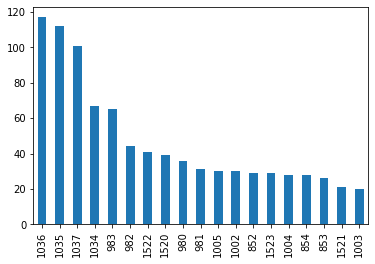

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

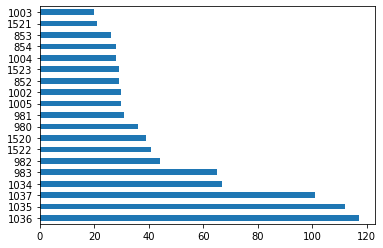

In [ ]:
#Grafico de barras horizontais domenor pro maior
df["LojaID"].value_counts(ascending=False).plot.barh()

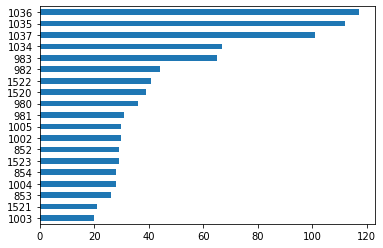

In [ ]:
#Grafico de barras horizontais no maior pro menor (o ; no fim tira aquele <matplotlib etc)
df["LojaID"].value_counts(ascending=True).plot.barh();

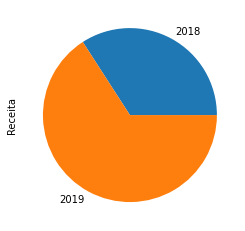

In [ ]:
#Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

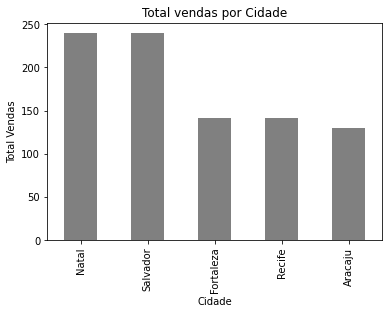

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title= "Total vendas por Cidade", color= "grey")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")